In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [10]:
dataset = pd.read_csv('INDF_stock_data.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,31.450001,31.450001,31.148001,31.148001,29.712090,500
1,2021-01-05,31.938000,31.938000,31.938000,31.938000,30.465670,100
2,2021-01-06,32.360001,32.382999,32.306000,32.382999,30.890154,600
3,2021-01-07,32.380001,32.490002,32.275002,32.388000,30.894924,900
4,2021-01-08,32.654999,32.748001,32.610001,32.748001,31.238331,3000


In [11]:
def quick_analysis(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)
quick_analysis(dataset)

Data Types:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
Rows and Columns:
(734, 7)
Column Names:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


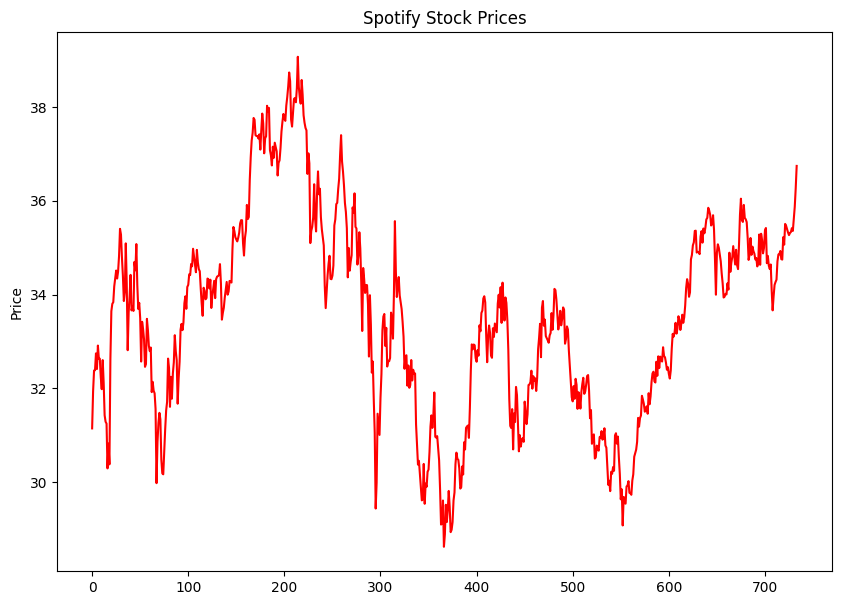

In [12]:
# Membuat DataFrame dari data harga saham
df = pd.DataFrame(dataset['Close'])
# Menghapus baris dengan nilai NaN
df.dropna(inplace=True)
dataset.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("Price")
plt.title("Spotify Stock Prices")
plt.show()

In [13]:
# Menambahkan kolom 'Label' untuk menunjukkan apakah harga saham naik atau turun
df['Label'] = df['Close'].shift(-1) > df['Close']

In [14]:
# Membagi data menjadi fitur dan label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Inisialisasi model
model = LogisticRegression()

# Training model dengan data training (X_train dan y_train)
model.fit(X_train, y_train)

# Memprediksi label untuk set pengujian
y_pred = model.predict(X_test)

In [16]:
# Memprediksi label untuk seluruh data
df['Prediksi'] = model.predict(X)
middle_sample = df.sample(n=5, random_state=42)
sample_index = middle_sample.index

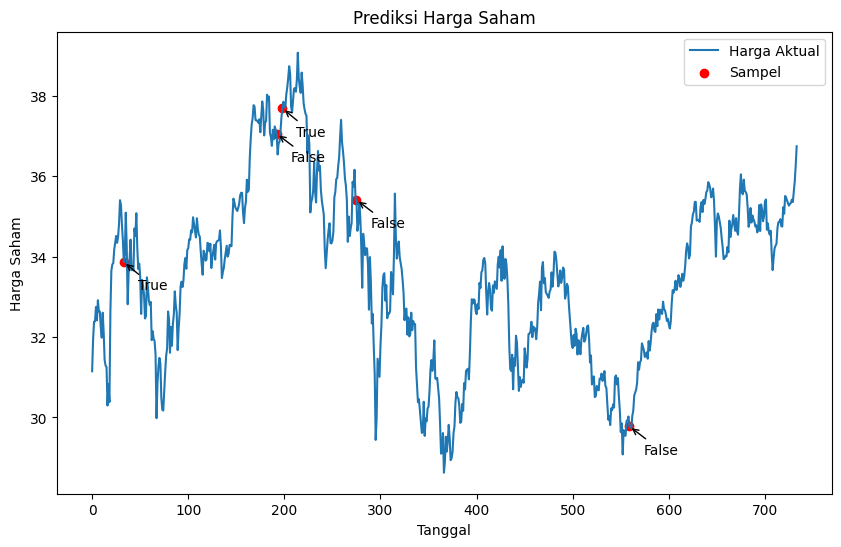

In [17]:
# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Harga Aktual')
plt.scatter(sample_index, middle_sample['Close'], color='red', label='Sampel')

# Menambahkan label True/False pada titik sampel
for index, row in middle_sample.iterrows():
    plt.annotate(str(row['Label']), (index, row['Close']), xytext=(10, -20),
                 textcoords='offset points', arrowprops=dict(arrowstyle="->", color='black'))

plt.xlabel('Tanggal')
plt.ylabel('Harga Saham')
plt.title('Prediksi Harga Saham')
plt.legend()
plt.show()

In [18]:
# Mencetak skor akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model: {:.2f}%".format(accuracy * 100))

Akurasi model: 56.46%


In [19]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Classification Report:
               precision    recall  f1-score   support

       False       0.53      0.51      0.52        68
        True       0.59      0.61      0.60        79

    accuracy                           0.56       147
   macro avg       0.56      0.56      0.56       147
weighted avg       0.56      0.56      0.56       147

